In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# nicer tables in Jupyter (display only)
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda v: f"{v:,.2f}")


In [4]:
#Import CSV
from pathlib import Path
csv_path = Path.home() / "Downloads" / "custodial_equipment_sales_USA_realistic.csv"



In [5]:
# Show table
df = pd.read_csv(csv_path)
df.head()

,Date,Month,Country,Region,State,City,Latitude,Longitude,Product_Category,Product_Subcategory,Sales_Channel,Units_Sold,Unit_Price,Revenue,Total_Cost,Profit,Margin_Percent,Target_Units,Target_Revenue
0,2024-01-21,2024-01,USA,South,Alabama,Birmingham,27.20,-94.07,Equipment,Walk-Behind Scrubber,Direct Sales,2,"10,457.84","20,915.67","15,218.05","5,697.63",27.24,3,"31,373.51"
1,2024-01-04,2024-01,USA,South,Alabama,Birmingham,27.20,-94.07,Equipment,Walk-Behind Scrubber,Distributor,2,"5,699.82","11,399.65","8,090.36","3,309.29",29.03,2,"11,399.65"
2,2024-01-01,2024-01,USA,South,Alabama,Birmingham,27.20,-94.07,Equipment,Walk-Behind Scrubber,Online Store,1,"5,394.88","5,394.88","4,013.04","1,381.85",25.61,2,"10,789.76"
3,2024-01-24,2024-01,USA,South,Alabama,Birmingham,27.20,-94.07,Equipment,Ride-On Scrubber,Direct Sales,1,"9,010.12","9,010.12","7,018.77","1,991.35",22.10,1,"9,010.12"
4,2024-01-09,2024-01,USA,South,Alabama,Birmingham,27.20,-94.07,Equipment,Ride-On Scrubber,Distributor,1,"9,299.81","9,299.81","6,679.32","2,620.49",28.18,1,"9,299.81"


In [6]:
# Convert date-like columns
for col in ["Date", "Month"]:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

# Strip whitespace in key text columns
for c in ["Country","Region","State","City","Sales_Channel",
          "Product_Category","Product_Subcategory"]:
    if c in df.columns and df[c].dtype == "object":
        df[c] = df[c].str.strip()

# Quick check
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38880 entries, 0 to 38879
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 38880 non-null  datetime64[ns]
 1   Month                38880 non-null  datetime64[ns]
 2   Country              38880 non-null  object        
 3   Region               38880 non-null  object        
 4   State                38880 non-null  object        
 5   City                 38880 non-null  object        
 6   Latitude             38880 non-null  float64       
 7   Longitude            38880 non-null  float64       
 8   Product_Category     38880 non-null  object        
 9   Product_Subcategory  38880 non-null  object        
 10  Sales_Channel        38880 non-null  object        
 11  Units_Sold           38880 non-null  int64         
 12  Unit_Price           38880 non-null  float64       
 13  Revenue              38880 non-

In [7]:
#Second check
print("Duplicates:", df.duplicated().sum())
nulls = df.isna().sum().sort_values(ascending=False)
display(nulls.head(10))

print("Unique states:", df["State"].nunique())
df["State"].unique()[:15]


Duplicates: 0


Date                   0
Month                  0
Country                0
Region                 0
State                  0
City                   0
Latitude               0
Longitude              0
Product_Category       0
Product_Subcategory    0
dtype: int64

Unique states: 51


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana'],
      dtype=object)

In [8]:
#Check for numerics
df[["Units_Sold","Unit_Price","Revenue","Total_Cost","Profit","Margin_Percent",
    "Target_Units","Target_Revenue"]].describe()


,Units_Sold,Unit_Price,Revenue,Total_Cost,Profit,Margin_Percent,Target_Units,Target_Revenue
count,"38,880.00","38,880.00","38,880.00","38,880.00","38,880.00","38,880.00","38,880.00","38,880.00"
mean,21.04,"2,657.76","5,771.33","3,734.69","2,036.64",36.17,23.19,"7,330.48"
std,21.85,"5,128.88","6,334.10","4,562.92","1,875.07",11.56,23.64,"8,602.58"
min,0.00,20.09,0.00,0.00,0.00,0.00,0.00,0.00
25%,4.00,109.14,"2,133.82","1,261.23",835.82,32.27,4.00,"2,567.61"
50%,11.00,232.37,"3,977.25","2,352.84","1,567.90",37.71,13.00,"4,668.47"
75%,34.00,"1,008.25","6,825.93","4,130.38","2,651.67",42.92,38.00,"8,094.56"
max,127.00,"21,997.01","65,618.81","48,034.49","20,729.89",55.00,138.00,"87,491.75"


In [9]:
#Revenue by State vs Target Revenue
state_kpis = (
    df
    .groupby("State")[["Revenue","Target_Revenue","Profit"]]
    .sum()
    .assign(
        Variance=lambda d: d["Revenue"] - d["Target_Revenue"],
        Attainment=lambda d: d["Revenue"] / d["Target_Revenue"]
    )
    .sort_values("Revenue", ascending=False)
)

state_kpis.head(10)


,Revenue,Target_Revenue,Profit,Variance,Attainment
State,,,,,
Texas,"8,035,683.22","9,956,755.25","2,854,465.79","-1,921,072.03",0.81
California,"7,937,369.96","10,132,452.19","2,803,175.05","-2,195,082.23",0.78
Massachusetts,"6,483,224.62","8,221,278.48","2,265,196.66","-1,738,053.86",0.79
Michigan,"6,395,689.41","8,115,569.83","2,235,697.00","-1,719,880.42",0.79
Colorado,"6,339,427.64","8,012,392.69","2,258,077.21","-1,672,965.05",0.79
Wyoming,"6,327,785.71","8,127,872.38","2,248,827.21","-1,800,086.67",0.78
Washington,"6,319,864.39","8,123,144.77","2,209,902.49","-1,803,280.38",0.78
Ohio,"6,314,955.08","7,917,216.75","2,228,813.82","-1,602,261.67",0.80
Florida,"6,295,862.17","8,087,582.98","2,209,028.13","-1,791,720.81",0.78


In [10]:
#Revenue by State vs Target Revenue (By worst attainment)
state_kpis.sort_values("Attainment", ascending=True).head(10)


,Revenue,Target_Revenue,Profit,Variance,Attainment
State,,,,,
Rhode Island,"1,975,361.74","2,577,941.13","704,857.23","-602,579.39",0.77
South Dakota,"2,084,450.46","2,718,401.99","744,091.29","-633,951.53",0.77
New Hampshire,"2,048,188.11","2,669,791.09","745,699.01","-621,602.98",0.77
Kansas,"4,084,637.01","5,300,153.76","1,440,043.07","-1,215,516.75",0.77
Oregon,"4,269,910.23","5,522,468.08","1,521,050.26","-1,252,557.85",0.77
Wisconsin,"4,152,110.99","5,357,303.12","1,456,012.46","-1,205,192.13",0.78
Alaska,"2,276,655.17","2,936,675.70","792,539.14","-660,020.53",0.78
North Carolina,"5,899,950.89","7,608,280.71","2,101,185.10","-1,708,329.82",0.78
Washington,"6,319,864.39","8,123,144.77","2,209,902.49","-1,803,280.38",0.78


In [11]:
#Sales by channel performance
channel_perf = (
    df
    .groupby("Sales_Channel")[["Units_Sold","Revenue","Profit"]]
    .sum()
    .assign(MarginPct=lambda d: (d["Profit"] / d["Revenue"]) * 100)
    .sort_values("Revenue", ascending=False)
)

channel_perf


,Units_Sold,Revenue,Profit,MarginPct
Sales_Channel,,,,
Distributor,272140,"74,999,016.07","26,494,181.49",35.33
Direct Sales,273383,"74,981,205.40","26,499,314.84",35.34
Online Store,272662,"74,408,895.49","26,190,961.96",35.20


In [12]:
#Top product subcategories by Profit + Margin%
subcategory_profit = (
    df
    .groupby("Product_Subcategory")[["Profit","Revenue","Units_Sold"]]
    .sum()
    .assign(MarginPct=lambda d: (d["Profit"] / d["Revenue"]) * 100)
    .sort_values("Profit", ascending=False)
)

subcategory_profit.head(10)


,Profit,Revenue,Units_Sold,MarginPct
Product_Subcategory,,,,
Ride-On Scrubber,"16,297,794.77","57,297,551.75",3700,28.44
Walk-Behind Scrubber,"11,169,184.63","39,266,976.46",4586,28.44
Lithium Pack,"9,122,448.68","24,375,480.17",24294,37.42
Disinfectant,"8,534,148.58","18,986,624.55",181778,44.95
Degreaser,"7,689,829.84","17,123,663.82",182903,44.91
Neutral Cleaner,"6,627,258.56","14,643,176.99",183407,45.26
AGM Deep Cycle,"6,453,490.11","17,208,927.47",36484,37.50
Brushes,"5,390,281.56","14,410,686.66",90937,37.40
Squeegees,"4,637,564.32","12,368,062.70",91763,37.50


In [13]:
#Monthly revenue trend + MoM growth
monthly_rev = (
    df
    .groupby("Month")["Revenue"]
    .sum()
    .sort_index()
)

monthly_growth = monthly_rev.pct_change() * 100
monthly_rev.head(), monthly_growth.head()

(Month
 2024-01-01   16,099,849.72
 2024-02-01   16,744,015.03
 2024-03-01   18,243,110.36
 2024-04-01   19,668,226.73
 2024-05-01   21,136,073.20
 Name: Revenue, dtype: float64,
 Month
 2024-01-01    NaN
 2024-02-01   4.00
 2024-03-01   8.95
 2024-04-01   7.81
 2024-05-01   7.46
 Name: Revenue, dtype: float64)

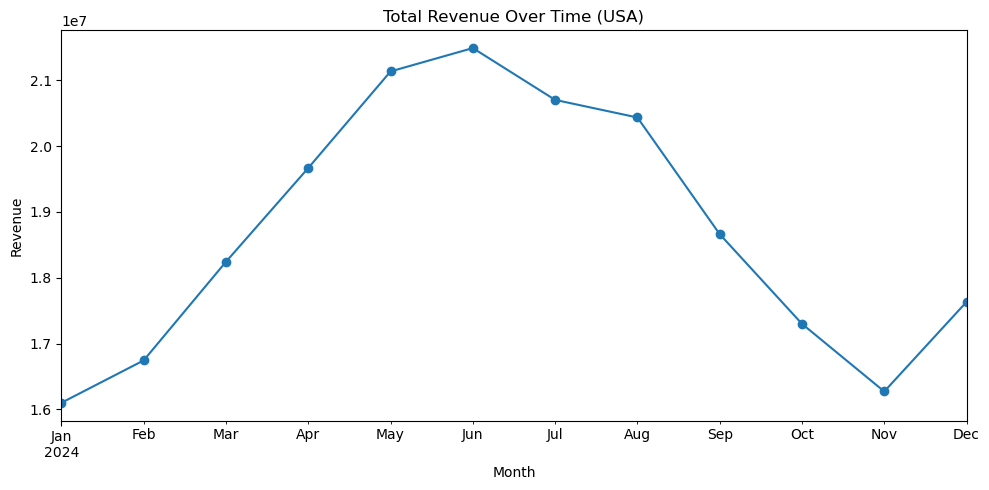

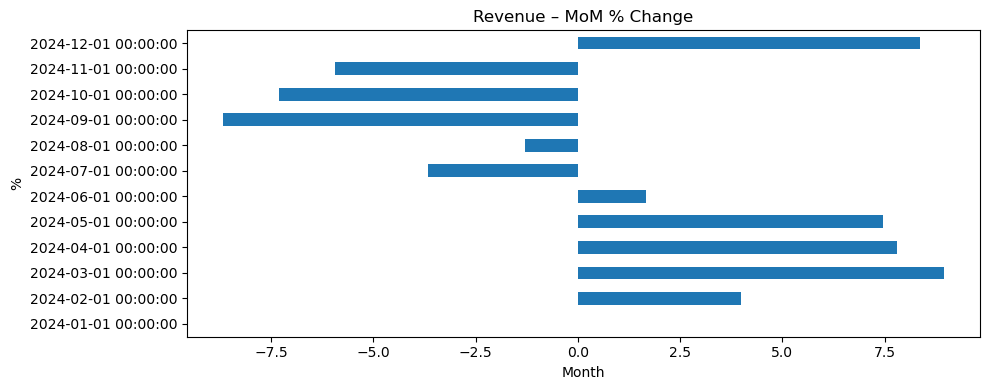

In [15]:
##Charts

# Revenue over time
monthly_rev.plot(kind="line", marker="o", figsize=(10,5))
plt.title("Total Revenue Over Time (USA)")
plt.xlabel("Month"); plt.ylabel("Revenue")
plt.tight_layout(); plt.show()

# MoM % growth
monthly_growth.plot(kind="barh", figsize=(10,4))
plt.title("Revenue – MoM % Change")
plt.xlabel("Month"); plt.ylabel("%")
plt.tight_layout(); plt.show()


In [16]:
#Best and worst cities by profit

city_profit = df.groupby("City")["Profit"].sum()

top10_cities = city_profit.sort_values(ascending=False).head(10)
bottom10_cities = city_profit.sort_values(ascending=True).head(10)

print("Top 10 Cities by Profit"); display(top10_cities)
print("\nBottom 10 Cities by Profit"); display(bottom10_cities)


Top 10 Cities by Profit


City
Aurora       1,494,079.03
Portland     1,492,808.13
Charleston   1,376,285.81
Cheyenne       796,885.29
Denver         795,914.94
Anchorage      792,539.14
Columbia       791,542.67
St. Louis      789,522.57
Boston         787,717.20
Reno           781,704.72
Name: Profit, dtype: float64


Bottom 10 Cities by Profit


City
Greensboro      673,102.13
Rochester       674,826.49
Sacramento      677,955.36
Idaho Falls     688,642.67
Pittsburgh      688,804.82
Overland Park   689,166.56
Chicago         690,451.37
Los Angeles     692,803.62
Orlando         695,685.57
Casper          695,763.47
Name: Profit, dtype: float64